Aluno: Lucas Melo de Carvalho



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

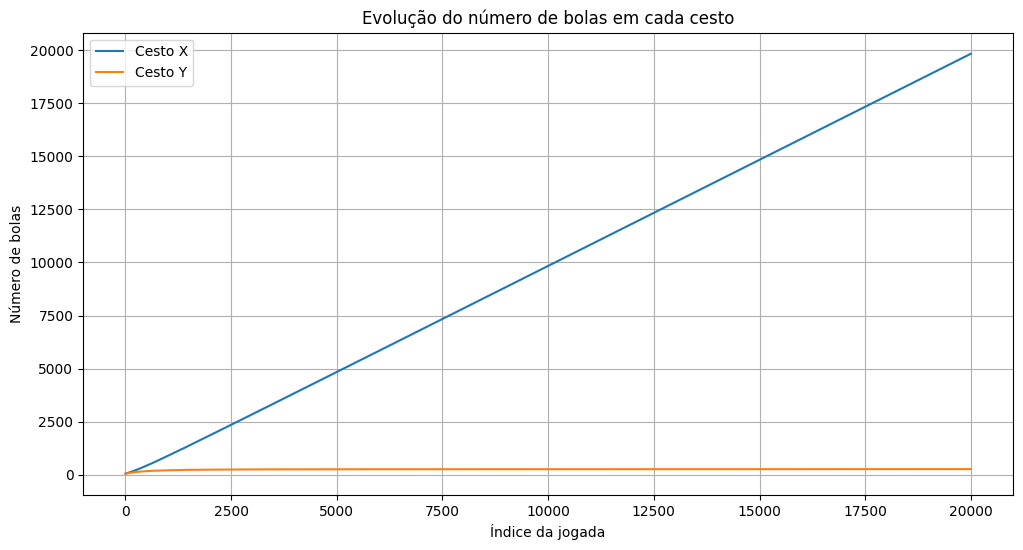

In [26]:
# Parâmetros iniciais
x = 51
y = 49
q = 2
n_lancamentos = 20000

# Contadores de bolas recebidas
bolas_recebidas_X = 0
bolas_recebidas_Y = 0

# Histórico do número de bolas em cada cesto
historico_X = [x]
historico_Y = [y]

# Simulação Monte Carlo
for _ in range(n_lancamentos):
    prob_X = (x ** q) / (x ** q + y ** q)
    prob_Y = (y ** q) / (x ** q + y ** q)

    if np.random.rand() < prob_X:
        x += 1
        bolas_recebidas_X += 1
    else:
        y += 1
        bolas_recebidas_Y += 1

    historico_X.append(x)
    historico_Y.append(y)

# Determinar o valor de c
c = min(bolas_recebidas_X, bolas_recebidas_Y)

# Determinar qual cesto recebeu mais bolas
if bolas_recebidas_X > bolas_recebidas_Y:
    cesto_mais_bolas = "X"
else:
    cesto_mais_bolas = "Y"

# Plot do gráfico
plt.figure(figsize=(12, 6))
plt.plot(historico_X, label="Cesto X")
plt.plot(historico_Y, label="Cesto Y")
plt.xlabel("Índice da jogada")
plt.ylabel("Número de bolas")
plt.title("Evolução do número de bolas em cada cesto")
plt.legend()
plt.grid()
plt.show()



In [27]:
# Resultados finais
print(f"Valor de c: {c}")
print(f"Cesto que recebeu mais bolas: {cesto_mais_bolas}")

Valor de c: 218
Cesto que recebeu mais bolas: X


In [28]:
def simular_lancamentos(n_lancamentos, x_inicial, y_inicial, q):
    x = x_inicial
    y = y_inicial

    bolas_recebidas_X = 0
    bolas_recebidas_Y = 0

    for _ in range(n_lancamentos):
        prob_X = (x ** q) / (x ** q + y ** q)
        prob_Y = (y ** q) / (x ** q + y ** q)

        if np.random.rand() < prob_X:
            x += 1
            bolas_recebidas_X += 1
        else:
            y += 1
            bolas_recebidas_Y += 1

    return x, y, bolas_recebidas_X, bolas_recebidas_Y

# Parâmetros iniciais
x_inicial = 51
y_inicial = 49
q = 2
n_lancamentos = 20000
n_simulacoes = 100

# Contador para verificar quantas vezes X termina com mais bolas
x_vence = 0

for _ in range(n_simulacoes):
    x_final, y_final, _, _ = simular_lancamentos(n_lancamentos, x_inicial, y_inicial, q)
    if x_final > y_final:
        x_vence += 1

frequencia_x_vence = x_vence / n_simulacoes

# Exibir resultado
print(f"Frequência com que o cesto X termina com mais bolas: {frequencia_x_vence:.2f}")

Frequência com que o cesto X termina com mais bolas: 0.68


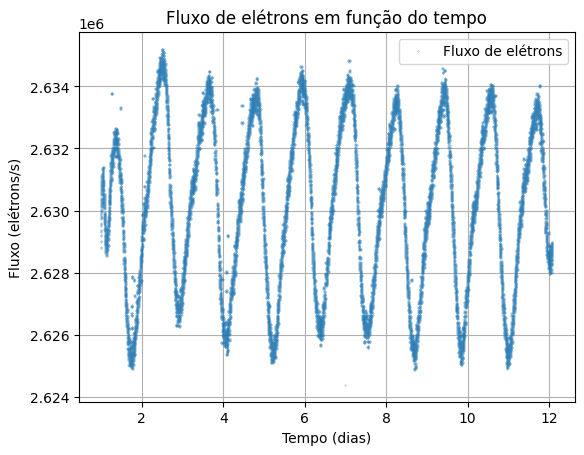

In [29]:
dados = np.loadtxt('./dados_tess.dat',delimiter=',')
fluxo = dados[:, 1]
tempo = dados[:, 0]


plt.plot(tempo, fluxo ,'o', markersize=0.2 ,label="Fluxo de elétrons")
plt.xlabel("Tempo (dias)")
plt.ylabel("Fluxo (elétrons/s)")
plt.title("Fluxo de elétrons em função do tempo")
plt.grid()
plt.legend()
plt.show()


In [30]:
# Calculando a amplitude de tempo em dias
tempo_total = np.max(tempo) - np.min(tempo)

# Calculando o número total de pontos
num_pontos = len(tempo)
taxa_amostragem = num_pontos / tempo_total
print(f"Taxa de amostragem: {taxa_amostragem:.2f} pontos por dia")

Taxa de amostragem: 2026.42 pontos por dia


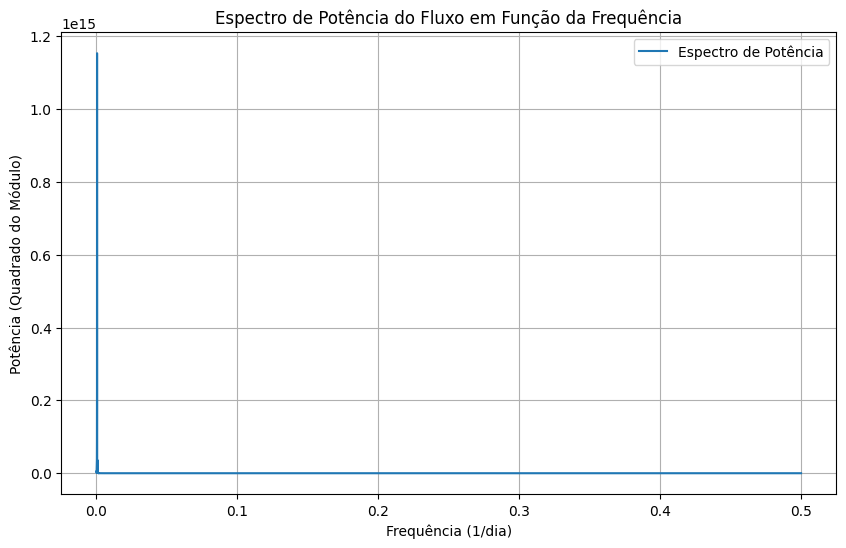

In [32]:
# Calcular a Transformada de Fourier
fft_fluxo = np.fft.rfft(fluxo)
frequencias = np.fft.rfftfreq(fluxo.size, 1)

# Remover o primeiro elemento
fft_fluxo = fft_fluxo[1:]
frequencias = frequencias[1:]

# Calcular o quadrado do módulo dos coeficientes de Fourier
ck2 = np.abs(fft_fluxo)**2

# Limitar os dados no eixo x ao intervalo de 0 a 5
mask = frequencias <= 5
frequencias = frequencias[mask]
ck2 = ck2[mask]



# Plotar o espectro de potência
plt.figure(figsize=(10, 6))
plt.plot(frequencias, ck2, label="Espectro de Potência")
plt.xlabel("Frequência (1/dia)")
plt.ylabel("Potência (Quadrado do Módulo)")
plt.title("Espectro de Potência do Fluxo em Função da Frequência")
plt.grid(True)
plt.legend()
plt.show()

In [33]:
# Identificar o índice do pico principal no espectro de potência limitado
indice_pico = np.argmax(ck2)

# Obter a frequência correspondente ao pico
frequencia_pico = frequencias[indice_pico]

# Calcular o período correspondente (inverso da frequência)
periodo_variabilidade = 1 / frequencia_pico

periodo_variabilidade

2243.1

Text(0, 0.5, 'Velocidade (km/s)')

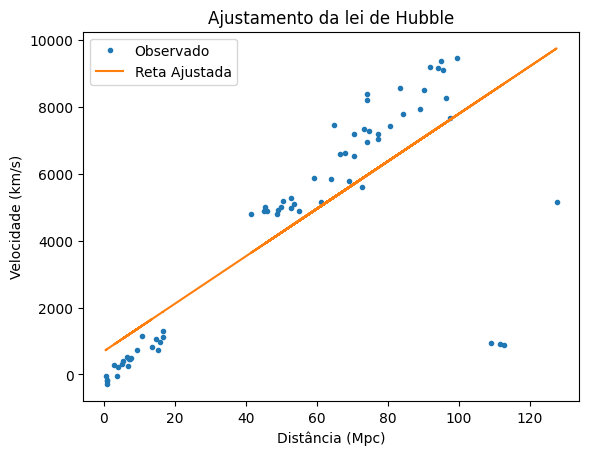

In [34]:
dados2 = np.loadtxt('./dados_galaxias.dat')
d = dados2[:,0]
v = dados2[:,1]

f = lambda a,x,b: a*x+b

[[a,b], m] = curve_fit(f, d, v)

est_f = lambda x: a*x+b

plt.plot(d, v, '.')
plt.plot(d, est_f(d))
plt.title('Ajustamento da lei de Hubble')
plt.legend(['Observado', 'Reta Ajustada'])
plt.xlabel(r'Distância (Mpc)')
plt.ylabel(r'Velocidade (km/s)')

In [35]:
H0 = a/3.086e19
print(f'H0 = {H0:.2e} 1/s')

H0 = 2.30e-18 1/s


In [36]:
t = 1/H0
t_bilhoes_anos = t/(1e9*365*24*3600)
print(f'Idade estimada = {t_bilhoes_anos:.2f} bilhões de anos')

Idade estimada = 13.79 bilhões de anos
